## Import Packages

In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns

## Question 1
### Import Data Frames

In [2]:

# Import the English data frame
df_en = pd.read_csv("data/CONcreTEXT_trial_EN.tsv" ,sep="\t")

# Import the Italian data frame
df_it = pd.read_csv("data/CONcreTEXT_trial_IT.tsv" ,sep="\t")



In [3]:

# Print the first 10 rows on the English data frame
df_en.head(10)


,TARGET,POS,INDEX,TEXT,MEAN
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06
1,achievement,N,9,"Please list people you have helped , your pers...",3.03
2,activate,V,1,Add activated carbon straight to your vodka .,3.83
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51
4,adventure,N,9,Look for a partner that shares your level of a...,2.03
5,adventure,N,5,"Most animated , action , adventure , thriller ...",2.58
6,air,N,9,If people think you ’re phony or putting on ai...,1.68
7,air,N,14,Place your tongue behind the hole in your lips...,4.55
8,bake,V,0,bake the fries until they are crispy and golde...,6.14
9,bake,V,6,Pour into a soufflé dish and bake until the to...,6.00


In [4]:

# Print the first 10 rows on the Italian data frame
df_it.head(10)


,TARGET,POS,INDEX,TEXT,MEAN
0,affascinare,V,8,Guardati i piedi o fai finta di essere affasci...,2.39
1,affascinare,V,1,Sei affascinato dal funzionamento della mente ...,2.03
2,amore,N,5,"Pensa ai tuoi sentimenti di amore , passione e...",2.71
3,amore,N,7,Quasi tutti sono in grado di ricevere amore e ...,2.16
4,aria,N,4,Accendi il condizionatore sull’ aria fredda ma...,5.68
5,aria,N,4,Chi vuole darsi delle arie di superiorità usa ...,1.90
6,arte,N,10,Osserva come lo zentangle si differenzia dalle...,3.35
7,arte,N,7,"Tirare su il prezzo è una vera arte , dunque i...",2.03
8,automobile,N,13,Attualmente la forma più comune di inquinament...,6.58
9,automobile,N,2,Guidare un’ automobile è una delle cose potenz...,6.26


###  Lowercase the words

In [5]:
# Import a list of punctuations
from string import punctuation


# Function to change words to lowercase
def lower_text(text):
    #Make text lowercase 
    text = text.lower()
    return text

# function to remove punctuation
def punc_rem(text):
    text.replace("'s", "")
    return ''.join(word for word in text if word not in punctuation)

# lambda function versions for the above functions
low_clean = lambda x: lower_text(x)
punc_clean = lambda x: punc_rem(x)


In [6]:

# Applying the lowercase and remove punctuation functions to the English data frame
df_en_clean = pd.DataFrame(df_en['TEXT'].apply(low_clean).apply(punc_clean))

# Joining all the lines of "TEXT" in the English df into one corpus
en_clean_text = " ".join(text for text in df_en_clean['TEXT'])


# Applying the lowercase and remove punctuation functions to the Italian data frame
df_it_clean = pd.DataFrame(df_it['TEXT'].apply(low_clean).apply(punc_clean))

# Joining all the lines of "TEXT" in the Italian df into one corpus
it_clean_text = " ".join(text for text in df_it_clean['TEXT'])


In [7]:

# Print the first 100 characters in both corpuses

print(en_clean_text[0:100])

print(it_clean_text[0:100])

bring up academic achievements  awards  and other milestones in your life   please list people you h
guardati i piedi o fai finta di essere affascinata dalla copertina del tuo libro   sei affascinato d


### Remove punctuation and Create a List of Words using tokenizer

In [8]:

# Import tokenizer
from nltk.tokenize import RegexpTokenizer

# Setting up tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Tokenizing the english corpus
en_tok_list = tokenizer.tokenize(en_clean_text)

# print the first 15 tokens in the list of words
en_tok_list[:15]



['bring',
 'up',
 'academic',
 'achievements',
 'awards',
 'and',
 'other',
 'milestones',
 'in',
 'your',
 'life',
 'please',
 'list',
 'people',
 'you']

In [9]:
# Tokenizing the english corpus
it_tok_list = tokenizer.tokenize(it_clean_text)

# print the first 15 tokens in the list of words
it_tok_list[:15]

['guardati',
 'i',
 'piedi',
 'o',
 'fai',
 'finta',
 'di',
 'essere',
 'affascinata',
 'dalla',
 'copertina',
 'del',
 'tuo',
 'libro',
 'sei']

### Output the number of words in each language (English and Italian) separately.

### Number of Words in Each Language 

#### English

In [10]:

# find the number of tokens in the English list of words
num_en_words = len(en_tok_list)

print('There are ' + str(num_en_words) + ' English words')


There are 1311 English words


#### Italian

In [11]:

# find the number of tokens in the Italian list of words
num_it_words = len(it_tok_list)

print('There are ' + str(num_it_words) + ' Italian words')


There are 1306 Italian words


### Distinct Words (count of all of the words in the corpus counted once)

In [12]:
# use the set function to create a list of distinct English words
en_distinct_words = set(en_tok_list)

# find the number of distinct English words
en_distinct_count = len(en_distinct_words)


# use the set function to create a list of distinct Italian words
it_distinct_words = set(it_tok_list)

# find the number of distinct Italian words
it_distinct_count = len(it_distinct_words)

# print results for both

print('There are ' + str(en_distinct_count) + ' distinct English words')

print('There are ' + str(it_distinct_count) + ' distinct Italian words')


There are 640 distinct English words
There are 711 distinct Italian words


### Unique Words (count of words that only appear once in the corpus)

In [13]:
# Import Counter
from collections import Counter

# function to get unique words
def unique_word_counter(tok_list):
    
    # create empty lists to append to
    unique_words = []
    
    #for loop to seperate out the single count words and append to above list
    for word, count in Counter(tok_list).most_common():
        if count == 1:
            unique_words.append(word)
    
    #find the number of words in the list of unique words
    length_un_wrds = len(unique_words)
    
    return length_un_wrds



# find the unique word count for English and Italian
en_unique_count = unique_word_counter(en_tok_list)
it_unique_count = unique_word_counter(it_tok_list)



# print results for both

print('There are ' + str(en_unique_count) + ' unique English words')

print('There are ' + str(it_unique_count) + ' unique Italian words')


There are 473 unique English words
There are 565 unique Italian words


### For the most frequent 25 words and for the most frequent 25 additional words that start with the letter m (a total of 50 words), print the word, the number of times it occurs, its rank in the overall list of words, the probability of occurrence, and the product of the rank and the probability.  There should be two list outputs -- one for English and one for Italian.

In [14]:
# Function to find the rank of each word
def add_rank(tok_list):
    
    # count and sort the words in decending order
    token_count_sorted = Counter(tok_list).most_common()
    
    #create empty list to be appended to
    ranked_tok_list = []
    
    # For loop to create a new list with rank added in
    for word, count in token_count_sorted:
        rank= len(ranked_tok_list) + 1
        ranked_tok_list.append((word, count, rank))
        
    return ranked_tok_list


# create new lists for english and italian with the rank added
rnk_srt_en_tok = add_rank(en_tok_list)
rnk_srt_it_tok = add_rank(it_tok_list)


In [15]:

#seperate out the top 25 most frequent words for English and Italian
en_tok_top25 = rnk_srt_en_tok[:25]
it_tok_top25 = rnk_srt_it_tok[:25]



In [16]:

# function to pull the top 25 most frequent words that start with 'm' not including the top 25 most frequent words
def top_m_min25(tok_list,top25_list):
    
    # remove the top 25 most frequent words from list
    tok_sort_min25 = [token for token in tok_list if token not in top25_list]
    
    #empty list to append to
    m_tokens = []
    
    # for loop to seperate out the words that start with 'm'
    for word, count, rank in tok_sort_min25:
        if word.startswith('m'):
            m_tokens.append((word, count, rank))
    
    # seperate out the first 25 'm' words
    m_token_top25 = m_tokens[:25]
    
    return m_token_top25
    
    
# create lists for the top 25 most freqent m words
en_m_min_top25 = top_m_min25(rnk_srt_en_tok,en_tok_top25)
it_m_min_top25 = top_m_min25(rnk_srt_it_tok,it_tok_top25)


en_m_min_top25

[('more', 6, 26),
 ('many', 3, 62),
 ('much', 3, 74),
 ('most', 2, 88),
 ('making', 2, 92),
 ('make', 2, 107),
 ('minutes', 2, 115),
 ('manner', 2, 152),
 ('movie', 2, 154),
 ('milestones', 1, 170),
 ('motion', 1, 184),
 ('mystery', 1, 196),
 ('mile', 1, 204),
 ('meditation', 1, 222),
 ('mind', 1, 223),
 ('monthly', 1, 246),
 ('mushy', 1, 266),
 ('medical', 1, 277),
 ('meals', 1, 347),
 ('matching', 1, 354),
 ('machine', 1, 361),
 ('messages', 1, 377),
 ('mouse', 1, 391),
 ('minute', 1, 397),
 ('mission', 1, 429)]

In [17]:
# combine the top 25 word list with the top m words list for English and Italian
final_50_en = en_tok_top25 + en_m_min_top25
final_50_it = it_tok_top25 + it_m_min_top25


In [18]:
# function to add in probability and probability time rank
# uses total corpus word count that was found above
def final_list(list_of_50, total_word_count):
    
    #empty list to append to
    fin_list = []
    
    #for loop to add new variables - probability and probability times rank
    for word, count, rank in list_of_50:
        prob = (count/total_word_count)
        prob_x_rank = (rank * prob)
        fin_list.append((word, count, rank, prob, prob_x_rank))
    
    return fin_list


# English final list with all five variables
en_final_list = final_list(final_50_en, num_en_words)

en_final_list


[('the', 63, 1, 0.04805491990846682, 0.04805491990846682),
 ('you', 45, 2, 0.034324942791762014, 0.06864988558352403),
 ('a', 39, 3, 0.029748283752860413, 0.08924485125858124),
 ('to', 36, 4, 0.02745995423340961, 0.10983981693363844),
 ('your', 35, 5, 0.02669717772692601, 0.13348588863463007),
 ('and', 33, 6, 0.02517162471395881, 0.15102974828375285),
 ('of', 29, 7, 0.02212051868802441, 0.15484363081617086),
 ('in', 20, 8, 0.015255530129672006, 0.12204424103737604),
 ('or', 19, 9, 0.014492753623188406, 0.13043478260869565),
 ('can', 14, 10, 0.010678871090770405, 0.10678871090770405),
 ('for', 13, 11, 0.009916094584286803, 0.10907704042715484),
 ('are', 13, 12, 0.009916094584286803, 0.11899313501144164),
 ('if', 12, 13, 0.009153318077803204, 0.11899313501144165),
 ('is', 11, 14, 0.008390541571319604, 0.11746758199847446),
 ('with', 10, 15, 0.007627765064836003, 0.11441647597254004),
 ('that', 9, 16, 0.006864988558352402, 0.10983981693363844),
 ('will', 9, 17, 0.006864988558352402, 0.116

In [19]:

# Italian final list with all five variables
it_final_list = final_list(final_50_it, num_it_words)

it_final_list

[('di', 51, 1, 0.03905053598774885, 0.03905053598774885),
 ('e', 33, 2, 0.02526799387442573, 0.05053598774885146),
 ('la', 31, 3, 0.023736600306278714, 0.07120980091883614),
 ('un', 28, 4, 0.021439509954058193, 0.08575803981623277),
 ('in', 21, 5, 0.016079632465543645, 0.08039816232771822),
 ('il', 21, 6, 0.016079632465543645, 0.09647779479326188),
 ('per', 19, 7, 0.01454823889739663, 0.10183767228177641),
 ('che', 18, 8, 0.013782542113323124, 0.11026033690658499),
 ('i', 17, 9, 0.013016845329249618, 0.11715160796324656),
 ('è', 17, 10, 0.013016845329249618, 0.13016845329249618),
 ('a', 17, 11, 0.013016845329249618, 0.1431852986217458),
 ('una', 16, 12, 0.01225114854517611, 0.14701378254211334),
 ('non', 15, 13, 0.011485451761102604, 0.14931087289433384),
 ('le', 15, 14, 0.011485451761102604, 0.16079632465543645),
 ('con', 13, 15, 0.009954058192955589, 0.14931087289433384),
 ('del', 12, 16, 0.009188361408882083, 0.14701378254211334),
 ('l', 12, 17, 0.009188361408882083, 0.1562021439509

In [20]:
# function to convert list to data frame
def final_df(final_list):
    df = pd.DataFrame(final_list, columns=['word','frequency','rank','probability', 'rank times probability'])
    return df

# convert English list to df
en_final_df = final_df(en_final_list)

en_final_df


,word,frequency,rank,probability,rank times probability
0,the,63,1,0.048055,0.048055
1,you,45,2,0.034325,0.068650
2,a,39,3,0.029748,0.089245
3,to,36,4,0.027460,0.109840
4,your,35,5,0.026697,0.133486
5,and,33,6,0.025172,0.151030
6,of,29,7,0.022121,0.154844
7,in,20,8,0.015256,0.122044
8,or,19,9,0.014493,0.130435
9,can,14,10,0.010679,0.106789


In [21]:

# convert English list to df
it_final_df = final_df(it_final_list)

it_final_df

,word,frequency,rank,probability,rank times probability
0,di,51,1,0.039051,0.039051
1,e,33,2,0.025268,0.050536
2,la,31,3,0.023737,0.071210
3,un,28,4,0.021440,0.085758
4,in,21,5,0.016080,0.080398
5,il,21,6,0.016080,0.096478
6,per,19,7,0.014548,0.101838
7,che,18,8,0.013783,0.110260
8,i,17,9,0.013017,0.117152
9,è,17,10,0.013017,0.130168


### Plot (a) frequency vs. rank and (b) log frequency vs. log rank in order to "visualize" Zipf's Law for each corpus (English and Italian). 

In [22]:
# create data frames for both corpuses using the functions created above for the English and Italian corpus
en_corpus_df = final_df(final_list(add_rank(en_tok_list),num_en_words))
it_corpus_df = final_df(final_list(add_rank(en_tok_list), num_it_words))

en_corpus_df.head(15)


,word,frequency,rank,probability,rank times probability
0,the,63,1,0.048055,0.048055
1,you,45,2,0.034325,0.068650
2,a,39,3,0.029748,0.089245
3,to,36,4,0.027460,0.109840
4,your,35,5,0.026697,0.133486
5,and,33,6,0.025172,0.151030
6,of,29,7,0.022121,0.154844
7,in,20,8,0.015256,0.122044
8,or,19,9,0.014493,0.130435
9,can,14,10,0.010679,0.106789


### English frequency vs. rank Plot

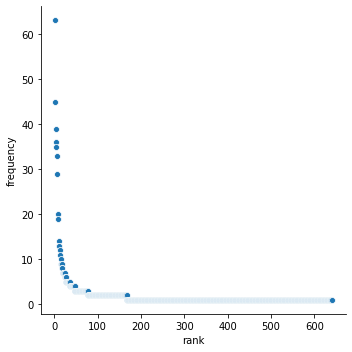

In [23]:

# Plot English freq vs rank
en_freq_rank_plot = sns.relplot(
    data=en_corpus_df,
    x="rank", y="frequency")



### English log frequency vs log rank Plot

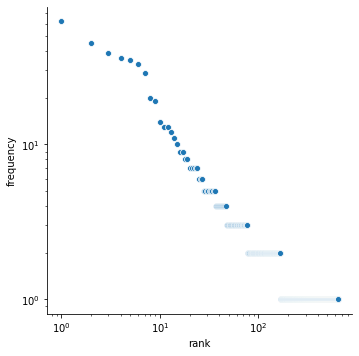

In [24]:

# Plot English log freq vs log rank

en_freq_rank_log_plot = sns.relplot(
    data=en_corpus_df,
    x="rank", y="frequency"
)
en_freq_rank_log_plot.set(xscale="log", yscale="log")


### Italian frequency vs rank Plot

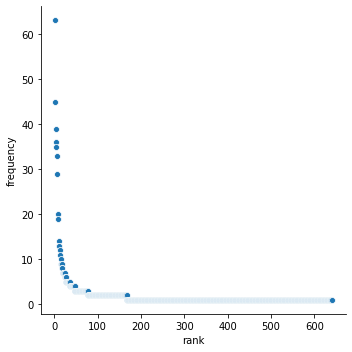

In [25]:

# Plot Italian freq vs rank

it_freq_rank_plot = sns.relplot(
    data=it_corpus_df,
    x="rank", y="frequency")



### Italian log frequency vs log rank Plot

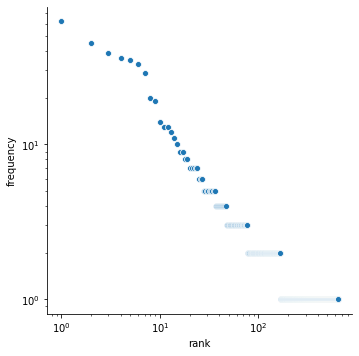

In [26]:

# Plot Italian log freq vs log rank

it_freq_rank_log_plot = sns.relplot(
    data=it_corpus_df,
    x="rank", y="frequency"
)
it_freq_rank_log_plot.set(xscale="log", yscale="log")